In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
os.chdir("E:\\PhD\\data sets\\CSV files")
df=pd.read_csv("desharnais.csv")
X=df.loc[:,df.columns !="effort"]
y=df["effort"]

In [3]:
lr = LinearRegression() 
kr=KNeighborsRegressor()
svr = SVR(kernel='linear', C=1)
dtr = DecisionTreeRegressor(random_state = 0)

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


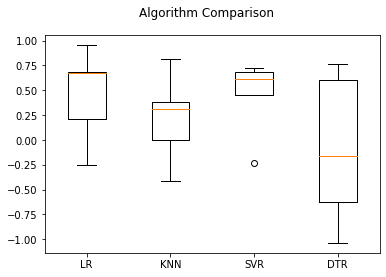

In [5]:
from sklearn.model_selection import cross_val_score
models = []
results=[]
names=[]
models.append(("LR",lr))
models.append(("KNN",kr))
models.append(("SVR",svr))
models.append(("DTR",dtr))


for name,m in models:
    
    scores = cross_val_score(m, X_train, y_train, cv=5)
    results.append(scores)
    names.append(name)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [6]:
vr = VotingRegressor(estimators=[('LR', lr), ('KNN', kr), ('SVR', svr),('DTR', dtr)] )
vr = vr.fit(X_train, y_train)
lr=lr.fit(X_train, y_train)
kr=kr.fit(X_train, y_train)
svr=svr.fit(X_train, y_train)
dtr=dtr.fit(X_train, y_train)

In [7]:
lr=lr.score(X_test,y_test)
kr=kr.score(X_test,y_test)
svr=svr.score(X_test,y_test)
vr=vr.score(X_test,y_test)
dtr=dtr.score(X_test,y_test)

In [8]:
scores=[lr,kr,svr,dtr,vr]

In [9]:
scores


[0.25728666055965366,
 0.19986706410293475,
 -0.06870382350122184,
 0.045471221528707306,
 0.3392275264843059]

<BarContainer object of 5 artists>

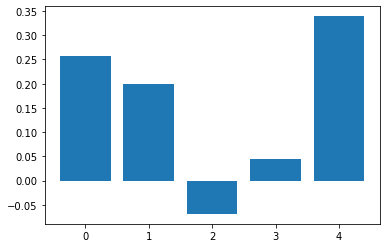

In [10]:
 plt.bar(range(5), scores)

# random forest Regressor Ensemble Bagging

In [11]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1)
rfr.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=16,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [12]:
rfr=rfr.score(X_test,y_test)

In [13]:
rfr

0.5479540101540453

# Ensemble boosting 

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=5, 
                                 n_estimators=3, 
                                 learning_rate=1.0)
gbrt.fit(X, y)
gbrt_score=gbrt.score(X_test,y_test)

In [15]:
gbrt_score

0.998072826401941

In [16]:
y_pred=gbrt.predict(X_test)
import numpy as np 
from sklearn.metrics import mean_squared_error 
gbrt_mse = mean_squared_error(y_pred, y_test) 
gbrt_rmse = np.sqrt(gbrt_mse) 
print('gradient boost RMSE: %.4f' % gbrt_rmse) 

gradient boost RMSE: 161.6428
